<a href="https://colab.research.google.com/github/nurhabibrs/predict-debtor-eligibility-/blob/main/Predict_Debtor_Eligibility_Using_Iterative_Dichotomiser_3_Based_On_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math

In [ ]:
path = '/content/gdrive/My Drive/Colab Notebooks/CI/'

### Preprocessing Data

In [ ]:
data = pd.read_csv(path+'AER_credit_card_data.csv')
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [ ]:
data["card"].replace({"yes": 1, "no": 0}, inplace=True)
data["owner"].replace({"yes": 1, "no": 0}, inplace=True)
data["selfemp"].replace({"yes": 1, "no": 0}, inplace=True)
data["card"] = data["card"].astype(str).astype(int)
data["owner"] = data["owner"].astype(str).astype(int)
data["selfemp"] = data["selfemp"].astype(str).astype(int)
data.sort_values('card')

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
659,0,0,23.25000,1.434,0.000837,0.00000,1,0,0,12,1,6
1034,0,10,43.25000,5.000,0.000240,0.00000,1,1,4,144,1,11
377,0,2,25.16667,2.500,0.000480,0.00000,0,1,1,30,1,18
375,0,0,32.83333,5.000,0.000240,0.00000,0,1,0,14,1,0
372,0,3,32.16667,2.800,0.000429,0.00000,1,0,3,106,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
499,1,0,25.41667,1.560,0.166063,215.88170,0,0,0,12,1,0
498,1,0,25.75000,1.850,0.059652,91.96417,1,0,0,24,1,9
496,1,0,42.25000,3.235,0.024766,66.26417,1,0,2,36,1,3
504,1,0,26.58333,2.350,0.064886,126.65080,0,0,1,26,1,2


In [ ]:
data.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner            int64
selfemp          int64
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [ ]:
data['card'].value_counts()

1    1023
0     296
Name: card, dtype: int64

### Feature Extraction

In [ ]:
feature_cols = ['reports', 'age',	'income',	'share',	'expenditure', 'owner',	'selfemp',	'dependents',	'months',	'majorcards',	'active']
X = data.iloc[:,1:].values #memasukkan value setiap baris dari setiap kolom mulai index 1 (reports) sampai akhir
y = data.iloc[:,0].values #memasukkan value setiap baris dari kolom index 0 (card)

In [ ]:
#membagi data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, train_size=0.9, shuffle = False)

In [ ]:
#Standarisasi data dengan rumus z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

In [ ]:
len(X_test)

132

### Training Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion="gini")
classifier1 = classifier1.fit(X_train,y_train)

classifier2 = DecisionTreeClassifier(criterion="entropy")
classifier2 = classifier2.fit(X_train,y_train)

In [ ]:
classifier2.tree_

In [ ]:
#Prediksi
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)

In [ ]:
y_pred1

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

### Evaluate Data

In [ ]:
from sklearn import metrics
print('Accuracy dengan Gini:', metrics.accuracy_score(y_test,y_pred1))
print('Precission dengan Gini:', metrics.precision_score(y_test,y_pred1))
print('Recall dengan Gini:', metrics.recall_score(y_test,y_pred1))
print('Zero one loss dengan Gini:', metrics.zero_one_loss(y_test,y_pred1))

Accuracy dengan Gini: 0.9621212121212122
Precission dengan Gini: 0.9583333333333334
Recall dengan Gini: 0.989247311827957
Zero one loss dengan Gini: 0.037878787878787845


In [ ]:
print('Accuracy dengan Entropy:', metrics.accuracy_score(y_test,y_pred2))
print('Precission dengan Entropy:', metrics.precision_score(y_test,y_pred2))
print('Recall dengan Entropy:', metrics.recall_score(y_test,y_pred2))
print('Zero one loss dengan Entropy:', metrics.zero_one_loss(y_test,y_pred2))

Accuracy dengan Entropy: 0.9545454545454546
Precission dengan Entropy: 0.9484536082474226
Recall dengan Entropy: 0.989247311827957
Zero one loss dengan Entropy: 0.045454545454545414


Confusion Matrix dengan Gini Impurity


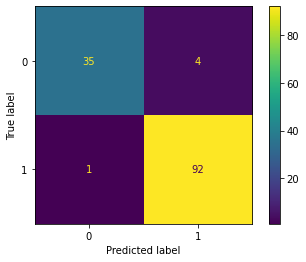


Confusion Matrix dengan Entropy


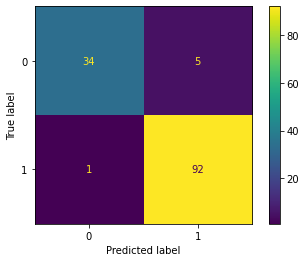

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=classifier1.classes_)
cm2 = confusion_matrix(y_test, y_pred2, labels=classifier2.classes_)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier1.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=classifier2.classes_)

print('Confusion Matrix dengan Gini Impurity')
disp1.plot()
plt.show()

print('\nConfusion Matrix dengan Entropy')
disp2.plot()
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

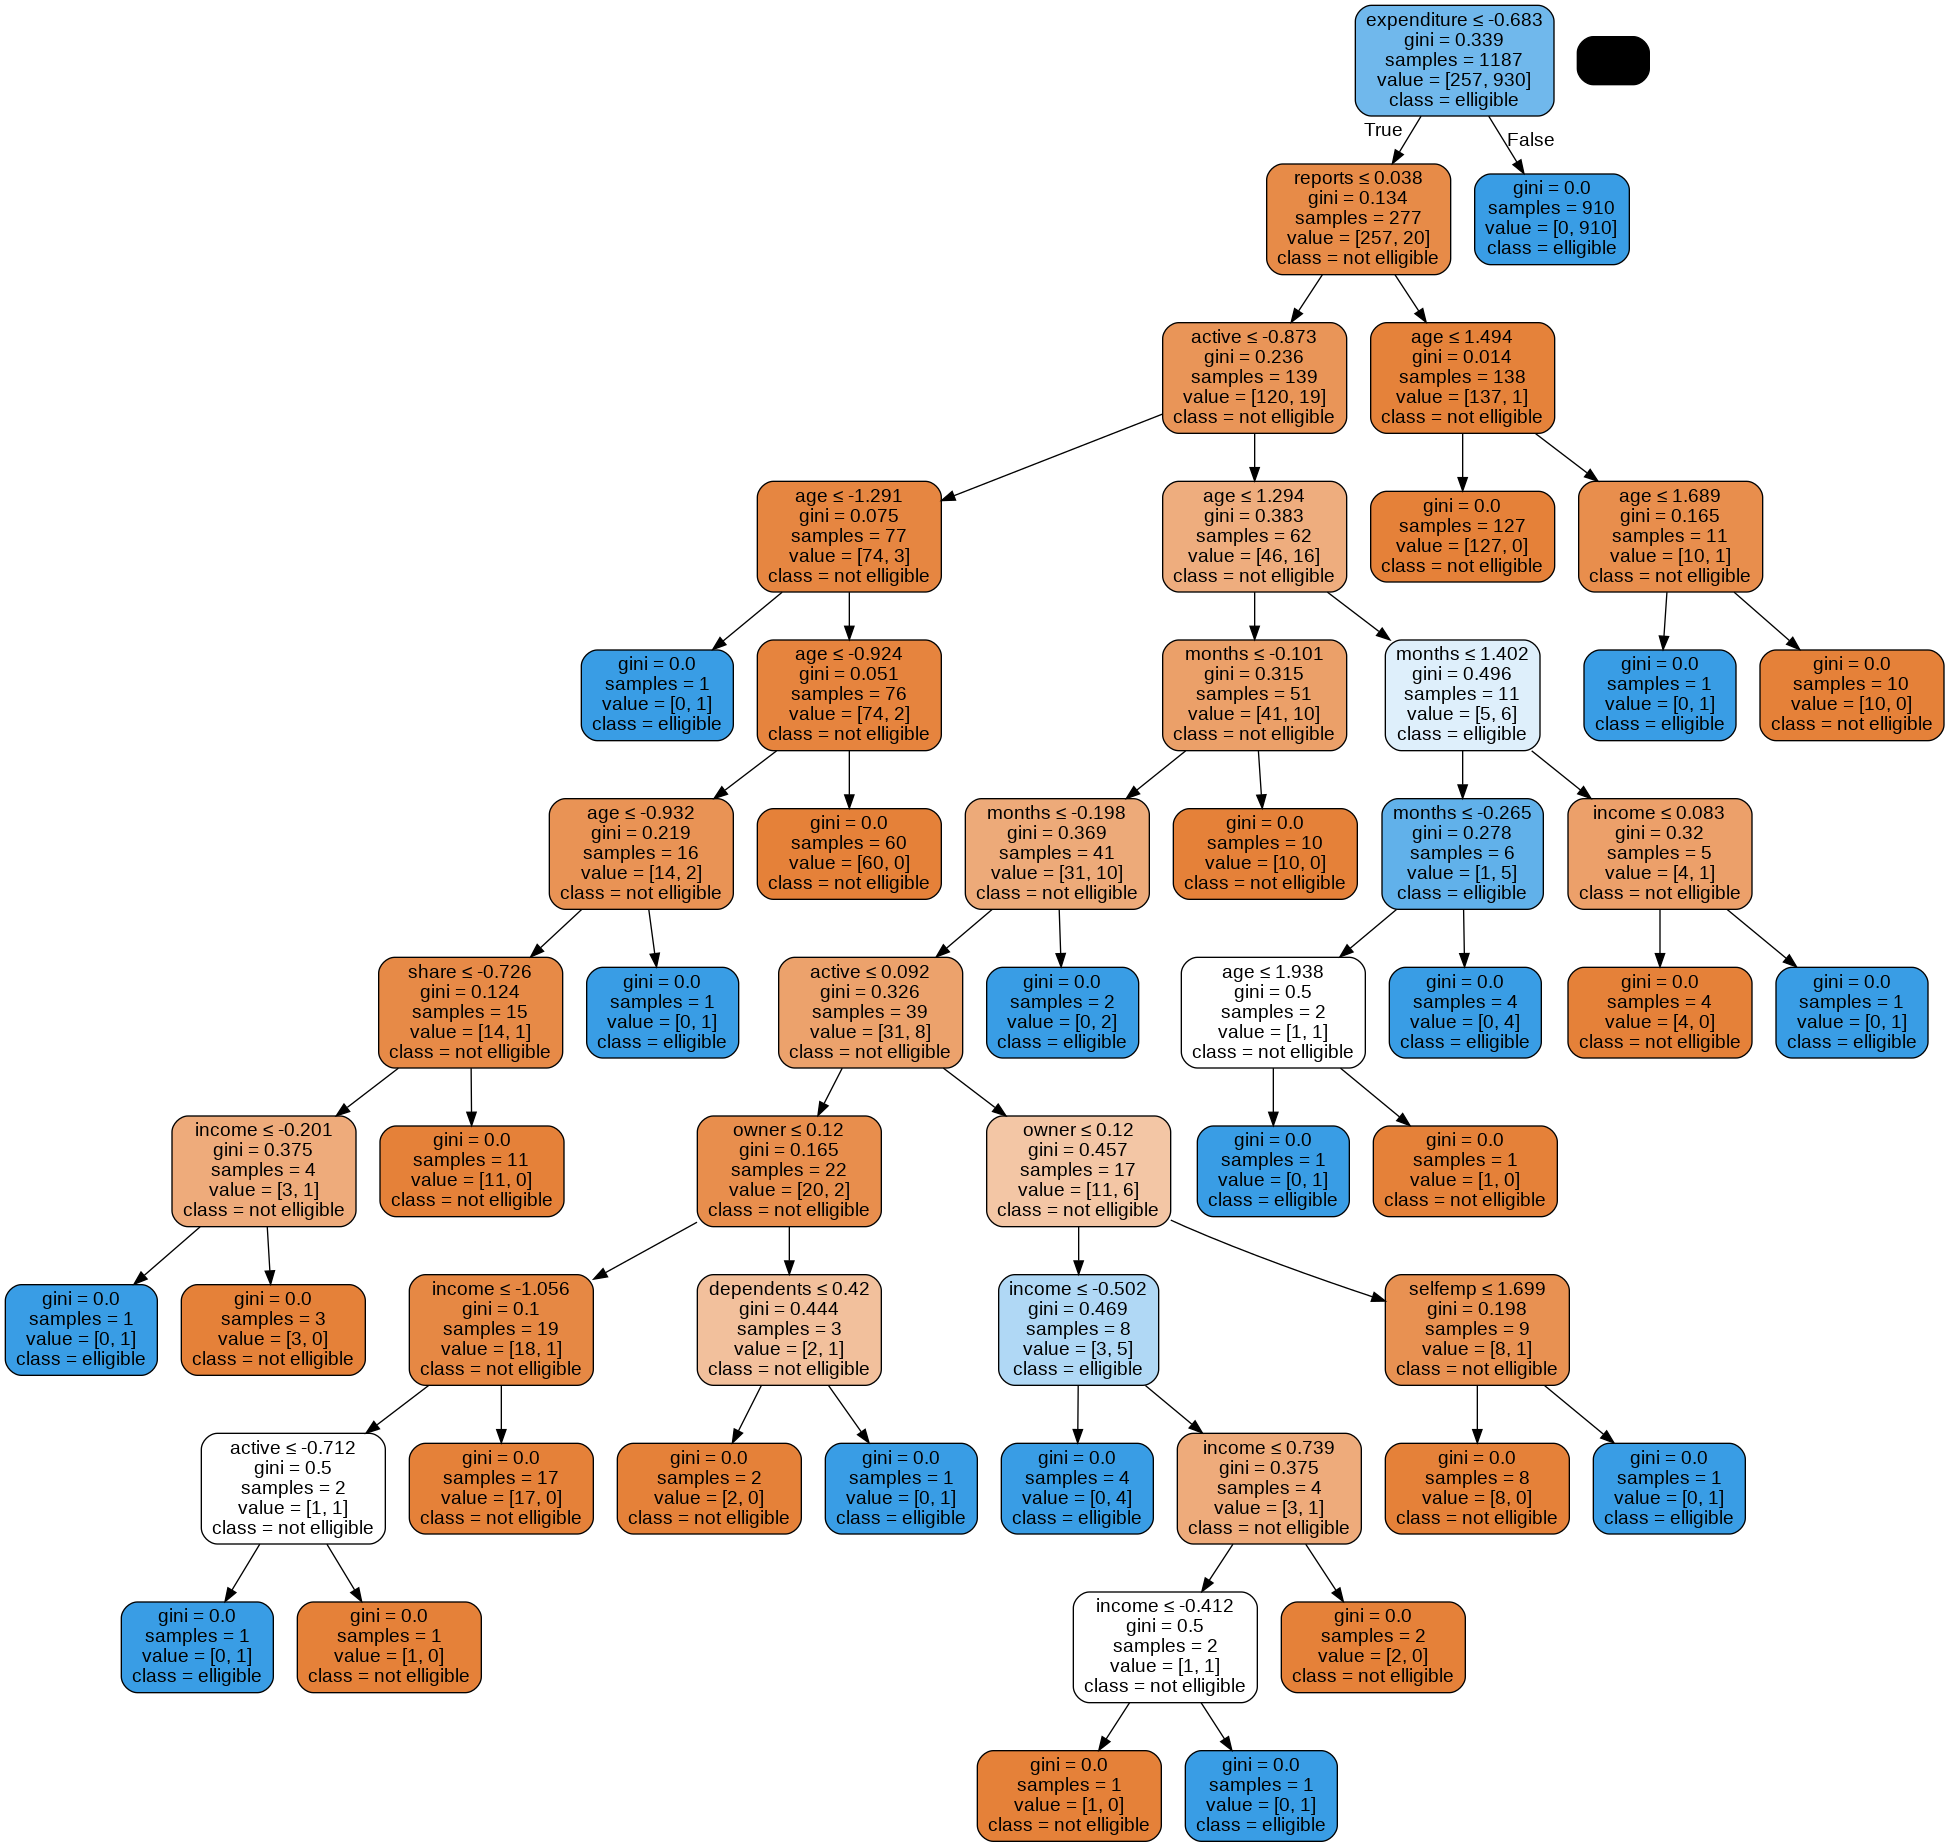

In [ ]:
dot_data1 = StringIO()
export_graphviz(classifier1, out_file=dot_data1, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['not elligible','elligible'])
graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
Image(graph1.create_png())

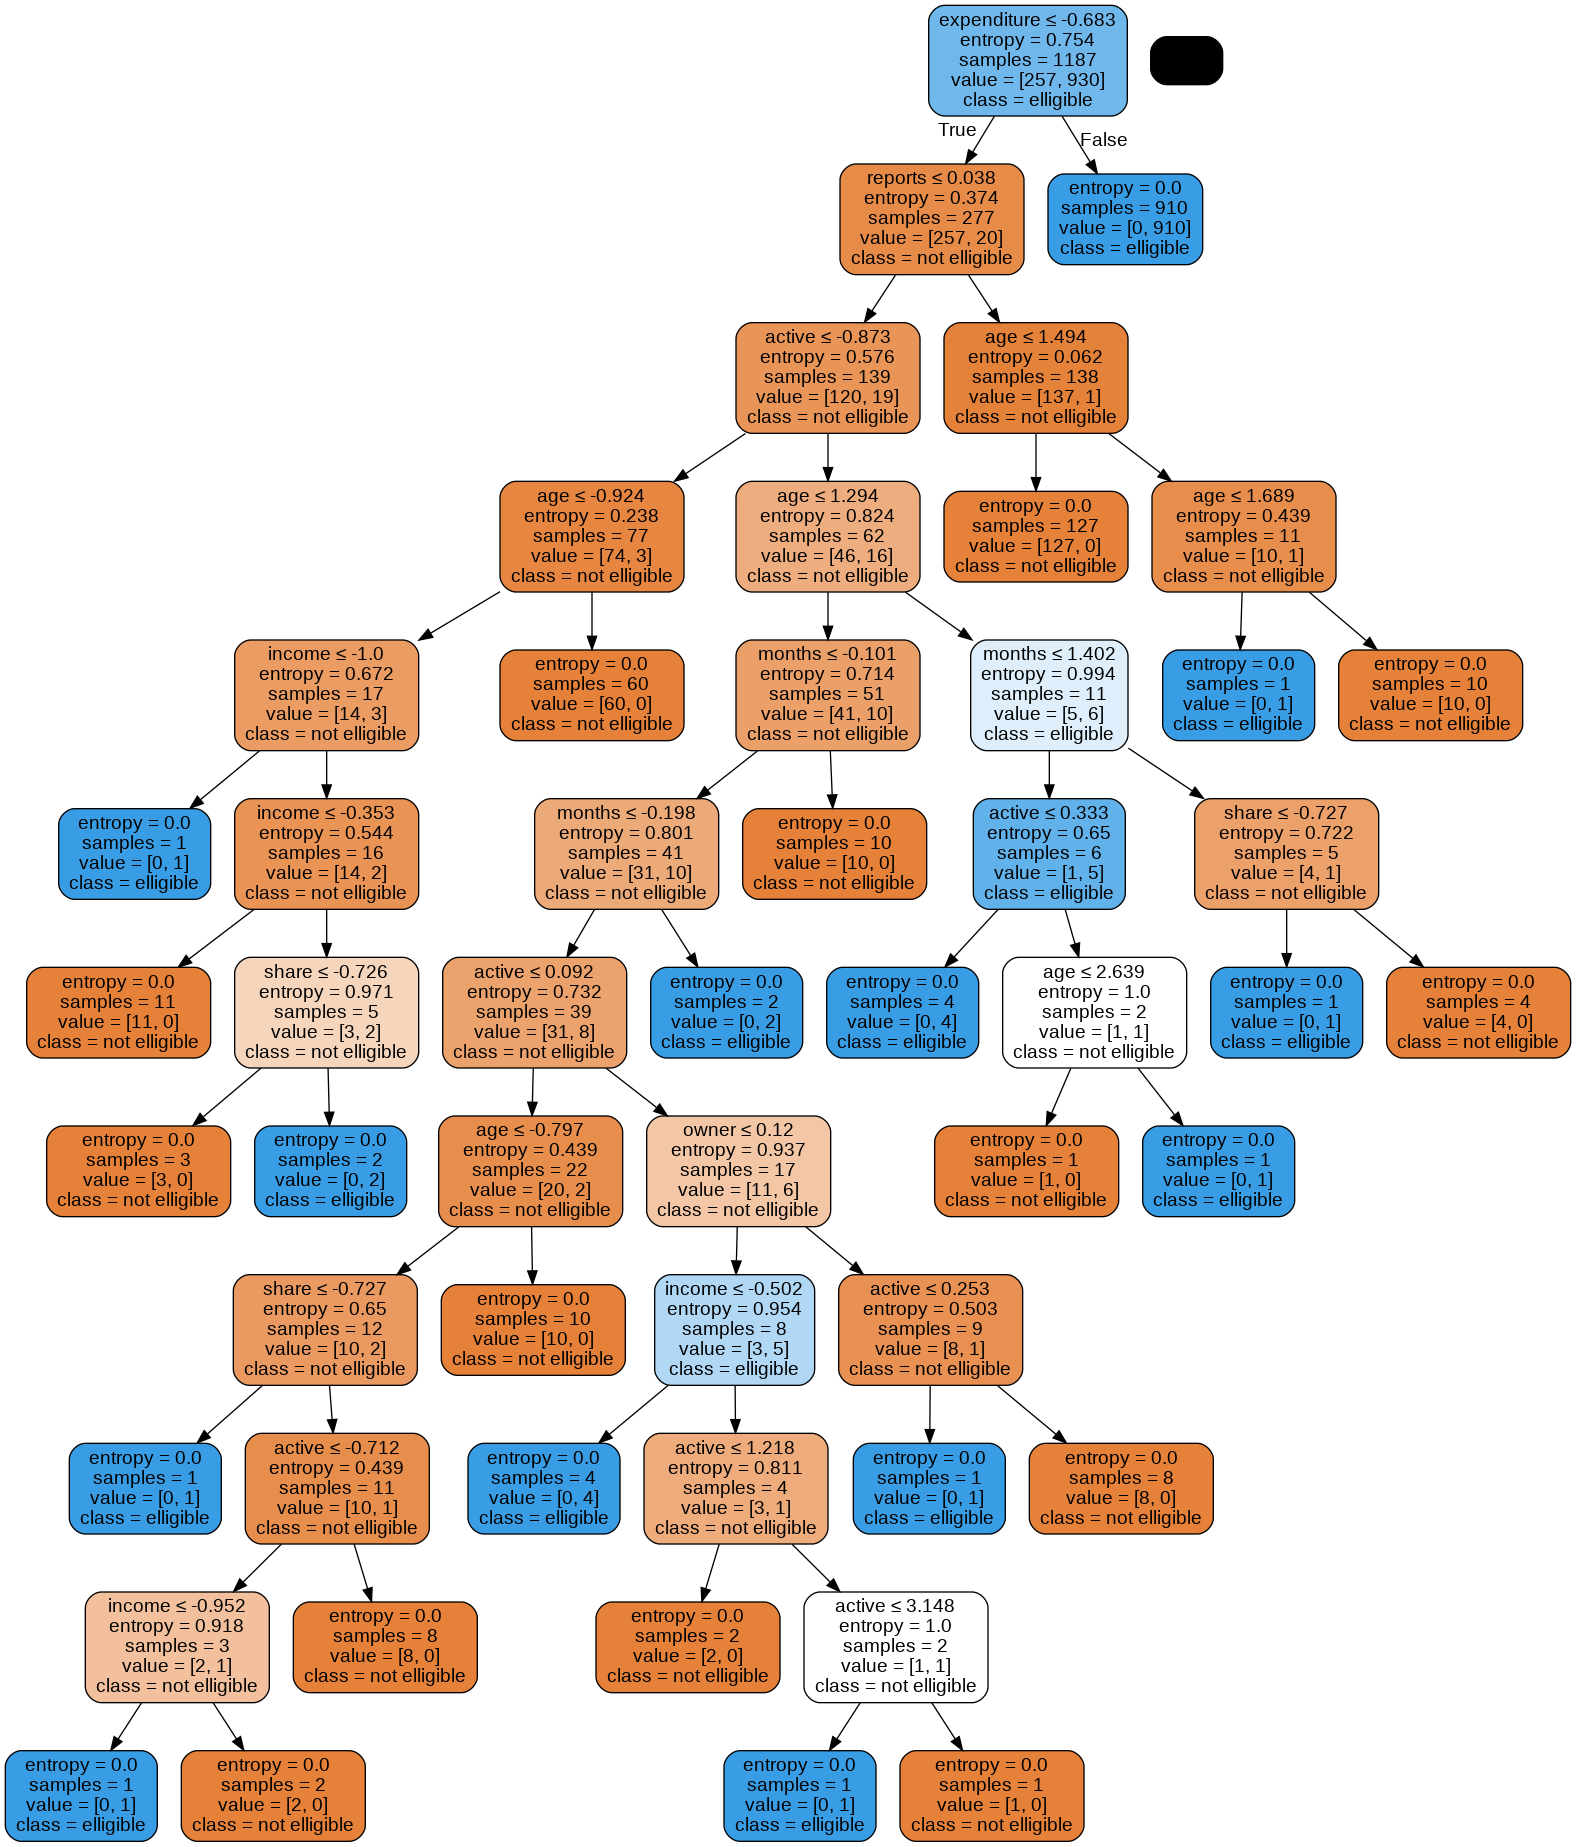

In [ ]:
dot_data2 = StringIO()
export_graphviz(classifier2, out_file=dot_data2, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['not elligible','elligible'])
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

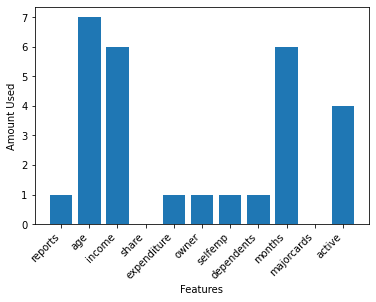

In [ ]:
a = ['reports', 'age',	'income',	'share',	'expenditure', 'owner',	'selfemp',	'dependents',	'months',	'majorcards',	'active']
b = [1, 7, 6, 0, 1, 1, 1, 1, 6, 0, 4]

import matplotlib.pyplot as plt
   
# Country = ['USA','Canada','Germany','UK','France']
# GDP_Per_Capita = [45000,42000,52000,49000,47000]

plt.bar(a, b)
plt.xlabel('Features')
plt.ylabel('Amount Used')
plt.xticks(rotation=45, ha='right')
plt.show()

### Genetic Algorithm 

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

rr1 = export_text(classifier1, feature_names=feature_cols, decimals = 5)
rr2 = export_text(classifier2, feature_names=feature_cols, decimals = 5)
cond1 = rr1.split('\n')
cond2 = rr2.split('\n')

In [ ]:
def setIf(index, y, condition):
  tmp = dict()
  kk = y
  con = condition
  for key in con[y:]:
    splt = key.split('|')
    rank = len(splt) - 1
    if rank < index: 
      break
    if rank == index:
      clear = splt[rank].replace('---', '').strip()
      if clear not in tmp:
        tmp[clear] = setIf(index+1, kk+1, con)
    kk = kk + 1
  return tmp

iff1 = setIf(1, 0, cond1)
iff2 = setIf(1, 0, cond2)

def getIf(arr, tmp, L):
  if len(tmp) != 0:
    if "class" in tmp[len(tmp)-1]:
      arr.append(tmp.copy())
      return arr
  for key in L:
    arrTmp = tmp.copy()
    arrTmp.append(key)
    arr = getIf(arr.copy(), arrTmp.copy(), L[key])
  return arr

condition1 = getIf([], [], iff1)
condition2 = getIf([], [], iff2)

In [ ]:
def getStringCondition(_condition):
  string = []
  for Cc in _condition:
    tmpS = "IF "+Cc[0]
    for c in Cc[1:len(Cc)-1]:
      tmpS = tmpS + " AND " + c
    tmpS = tmpS + " THEN " + Cc[len(Cc) - 1]
    string.append(tmpS)
  return string

branch1 = getStringCondition(condition1)
branch2 = getStringCondition(condition2)

In [ ]:
branch2

['IF expenditure <= -0.68340 AND reports <= 0.03758 AND active <= -0.87267 AND age <= -0.92372 AND income <= -1.00027 THEN class: 1',
 'IF expenditure <= -0.68340 AND reports <= 0.03758 AND active <= -0.87267 AND age <= -0.92372 AND income >  -1.00027 AND income <= -0.35265 THEN class: 0',
 'IF expenditure <= -0.68340 AND reports <= 0.03758 AND active <= -0.87267 AND age <= -0.92372 AND income >  -1.00027 AND income >  -0.35265 AND share <= -0.72634 THEN class: 0',
 'IF expenditure <= -0.68340 AND reports <= 0.03758 AND active <= -0.87267 AND age <= -0.92372 AND income >  -1.00027 AND income >  -0.35265 AND share >  -0.72634 THEN class: 1',
 'IF expenditure <= -0.68340 AND reports <= 0.03758 AND active <= -0.87267 AND age >  -0.92372 THEN class: 0',
 'IF expenditure <= -0.68340 AND reports <= 0.03758 AND active >  -0.87267 AND age <= 1.29394 AND months <= -0.10050 AND months <= -0.19770 AND active <= 0.09219 AND age <= -0.79735 AND share <= -0.72650 THEN class: 1',
 'IF expenditure <= 

In [ ]:
def getFiltered(label, number, symbol, tmpX, tmpY):
  if len(tmpX) == 0: return tmpX, tmpY
  index = feature_cols.index(label)
  index_test = []

  if symbol:
    index_test = [a for a in range(len(tmpX)) if tmpX[a][index] <= number]
  else:
    index_test = [a for a in range(len(tmpX)) if tmpX[a][index] > number]
  testX = [tmpX[a] for a in index_test]
  testY = [tmpY[a] for a in index_test]

  return testX, testY

In [ ]:
def getEntropy(tmpY):
  nTrue = 0
  nFalse = 0
  for x in tmpY:
    if x == 0: nFalse = nFalse + 1
    else: nTrue = nTrue + 1
  
  nTotal = nTrue + nFalse
  if nTotal == 0:
    entropy = 0
  else:
    pTrue = nTrue/nTotal
    pFalse = nFalse/nTotal
    if pTrue == 0 or pFalse == 0:
      entropy = 0
    else: 
      mTrue = pTrue* math.log(pTrue)
      mFalse = pFalse * math.log(pFalse)
      entropy = - (mTrue + mFalse)

  return entropy

entropyParent = getEntropy(y_train)
entropyParent

0.5224580096601634

In [ ]:
Wa = 0.1
Wb = 0.1
Wc = 0.1
Wd = 0.7

In [ ]:
def countAttribute(rule):
  arr = []
  for r in rule:
    if "class" not in r:
      name = r.split()
      arr.append(name[0])

  return len(set(arr))

def getFitness(condition, XX, YY):
  fit = []
  data = []
  gains = []
  max_gain = -1
  for RULES in condition:
    tmpX = XX.copy()
    tmpY = YY.copy()

    for rule in RULES:
      if "class" not in rule:
        tmp = rule.split()
        tmpX, tmpY = getFiltered(tmp[0], float(tmp[2]), tmp[1] == '<=', tmpX, tmpY)
    arr = [tmpX.copy(), tmpY.copy()]
    data.append(arr)
    gain = entropyParent - getEntropy(tmpY)
    if gain > max_gain:
      max_gain = gain
    gains.append(gain)

  for index in range(len(condition)):
    if len(data[index][0]) == 0:
      acc = 0.0
      pre = [0.0]
    else:
      predY = classifier1.predict(data[index][0])
      mtx = confusion_matrix(data[index][1], predY)
      acc = metrics.accuracy_score(data[index][1], predY)
      pre = metrics.precision_score(data[index][1], predY, average=None, zero_division=0)
      rec = metrics.recall_score(data[index][1], predY, average=None, zero_division=0)

    simplicity = (len(feature_cols) - countAttribute(condition[index]))/len(feature_cols)
    gain = gains[index]/max_gain

    max_fit = simplicity*Wa + pre[0]*Wb + acc*Wc + gain*Wd
    # print(str(max_fit)+" "+str(simplicity)+" "+str(pre[0])+" "+str(acc))
    fit.append(max_fit)
    # fit.append(acc)
  return fit

In [ ]:
def getAvg(arr):
  sum = 0.0
  for x in arr:
    sum = sum + x
  return sum/len(arr)

### Crossover and Mutation

In [ ]:
Max_generation = 100
pCross = 0.85
pMut = 0.09

In [ ]:
import random as rand

def crossover(chromosome, i, j):
  ca = chromosome[i]
  cb = chromosome[j]
  pointSwap = False
  cA = []
  cB = []
  for x in range(max(len(ca), len(cb))):
    aa = (len(ca) > x)
    bb = len(cb) > x
    if pointSwap:
      if bb: cA.append(cb[x])
      if aa: cB.append(ca[x])
    else:
      if aa: cA.append(ca[x])
      if bb: cB.append(cb[x])
    
    if aa and bb:
      if not pointSwap and ca[x] != cb[x]:
        sA = ca[x].split()
        sB = cb[x].split()
        if sA[0] == sB[0]:
          pointSwap = True
  chromosome[i] = cA
  chromosome[j] = cB
  return chromosome

def mutation(chromosome, idx):
  target = chromosome[idx]
  random = math.floor(rand.random() * len(target))
  splt = target[random].split()

  if len(splt) < 3:
    splt[1] = (int(splt[1])+1)%2
    target[random] = splt[0] + ' ' + str(splt[1])
    chromosome[idx] = target 
    return chromosome
  
  # if splt[1] == '<=':
  #   splt[1] = '>'
  # elif splt[1] == '>':
  #   splt[1] = '<='
  
  # target[random] = splt[0] + ' ' + splt[1] + ' ' +  splt[2]
  # chromosome[idx] = target

  return chromosome

def GA(_condition):
  Sc = rand.random()
  if Sc < pCross:
    a = math.floor(rand.random()*len(_condition))
    b = math.floor(rand.random()*len(_condition))
    crossover(_condition, a, b)

  # Sm = rand.random()
  # if Sm < pMut:
  #   idx = math.floor(rand.random() * len(_condition))
  #   mutation(_condition, idx)
  
  return _condition

In [ ]:
import sys

def indexMin(arr):
  index = -1
  value = sys.maxsize * 2 + 1
  i = 0
  for x in arr:
    if value > x:
      value = x
      index = i
    i = i + 1
  return index

def indexMax(arr):
  index = -1
  value = 0
  i = 0
  for x in arr:
    if value < x:
      value = x
      index = i
    i = i + 1
  return index

### Genetic Algorithm Training Section

In [ ]:
def training(condition):
  P = getFitness(condition, X_train, y_train)
  avgBefore = avgNow = getAvg(P)
  allFit = []
  allValFit = []
  I = 0
  threshold = 0
  while I <= Max_generation or avgNow - avgBefore > threshold:
    I = I + 1
    offspring = GA(condition.copy())
    Poff = getFitness(offspring, X_train, y_train)

    lowerIndex = indexMin(P)
    higherIndex = indexMax(Poff)
    if P[lowerIndex] < Poff[higherIndex]:
      condition[lowerIndex] = offspring[higherIndex]
    P = getFitness(condition, X_train, y_train)
    valP = getFitness(condition, X_test, y_test)
    avgValP = getAvg(valP)

    avgBefore = avgNow
    avgNow = getAvg(P)
    print("Iteration ", I, " \t| branch replacing: [",lowerIndex,"] <= [",higherIndex,"] \t| offspring fitness: "
      ,getAvg(Poff)," \t| fitness: ",avgNow," \t| validation fitness: ", avgValP)
    allFit.append(avgNow)
    allValFit.append(avgValP)
  return {"fitness":allFit, "val_fitness":allValFit}

In [ ]:
history1 = training(condition1)

Iteration  1  	| branch replacing: [ 6 ] <= [ 27 ] 	| offspring fitness:  0.9336328029926797  	| fitness:  0.9522727272727269  	| validation fitness:  0.8093807478654858
Iteration  2  	| branch replacing: [ 7 ] <= [ 6 ] 	| offspring fitness:  0.9209074423224706  	| fitness:  0.9542207792207789  	| validation fitness:  0.8184716569563949
Iteration  3  	| branch replacing: [ 8 ] <= [ 6 ] 	| offspring fitness:  0.9418131612694226  	| fitness:  0.9561688311688308  	| validation fitness:  0.8204197089044468
Iteration  4  	| branch replacing: [ 9 ] <= [ 6 ] 	| offspring fitness:  0.9284825516842493  	| fitness:  0.9581168831168828  	| validation fitness:  0.829510617995356
Iteration  5  	| branch replacing: [ 10 ] <= [ 6 ] 	| offspring fitness:  0.9581168831168828  	| fitness:  0.9600649350649347  	| validation fitness:  0.8386015270862649
Iteration  6  	| branch replacing: [ 11 ] <= [ 6 ] 	| offspring fitness:  0.9252387954890559  	| fitness:  0.9620129870129867  	| validation fitness:  0.8

In [ ]:
history2 = training(condition2)

Iteration  1  	| branch replacing: [ 6 ] <= [ 26 ] 	| offspring fitness:  0.9328186914911442  	| fitness:  0.9535353535353533  	| validation fitness:  0.8318942884710537
Iteration  2  	| branch replacing: [ 7 ] <= [ 26 ] 	| offspring fitness:  0.9406681941783913  	| fitness:  0.9555555555555553  	| validation fitness:  0.8413218978986633
Iteration  3  	| branch replacing: [ 10 ] <= [ 6 ] 	| offspring fitness:  0.9276508071635935  	| fitness:  0.9575757575757573  	| validation fitness:  0.8507495073262726
Iteration  4  	| branch replacing: [ 11 ] <= [ 6 ] 	| offspring fitness:  0.9427609427609426  	| fitness:  0.9595959595959593  	| validation fitness:  0.8601771167538821
Iteration  5  	| branch replacing: [ 12 ] <= [ 6 ] 	| offspring fitness:  0.9595959595959593  	| fitness:  0.9616161616161614  	| validation fitness:  0.8696047261814913
Iteration  6  	| branch replacing: [ 13 ] <= [ 6 ] 	| offspring fitness:  0.941341594851792  	| fitness:  0.9636363636363634  	| validation fitness:  

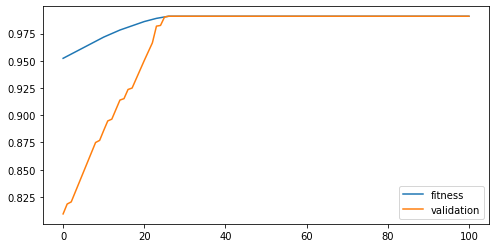

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history1["fitness"], label="fitness")
plt.plot(history1["val_fitness"], label="validation")
plt.legend()

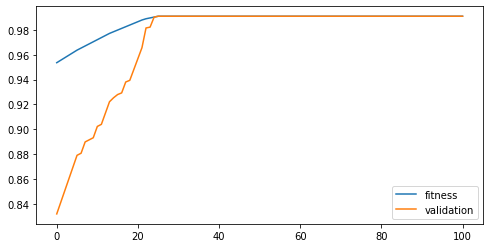

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history2["fitness"], label="fitness")
plt.plot(history2["val_fitness"], label="validation")
plt.legend()

### Selecting Optimum Branch

In [ ]:
lastCondition1 = getStringCondition(condition1)
lastCondition2 = getStringCondition(condition2)
lastCondition1

['IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expenditure >  -0.68340 THEN class: 1',
 'IF expen

In [ ]:
def optimize(condition_):
  tmpSet1 = set()

  for x1 in condition_:
    tmpSet1.add(tuple(x1))
  
  for x1 in tmpSet1:
    x1 = list(x1)

  return list(tmpSet1)

In [ ]:
optimizeCondition1 = optimize(condition1)
showOptimize1 = getStringCondition(optimizeCondition1)
showOptimize1

['IF expenditure >  -0.68340 THEN class: 1']

In [ ]:
optimizeCondition2 = optimize(condition2)
showOptimize2 = getStringCondition(optimizeCondition2)
showOptimize2

['IF expenditure >  -0.68340 THEN class: 1']

### Build New Decision Tree

In [ ]:
!pip install anytree

     |████████████████████████████████| 41 kB 443 kB/s 


In [ ]:
from anytree import Node, RenderTree

def getChildren(H, name):
  node = None
  for x in H.children:
    if x.name == name:
      node = x
      break
  return node

In [ ]:
def createTree(condition):
  head = Node("head")
  for opc in condition:
    prt = head
    for con in opc:
      child =  getChildren(prt, con)

      if child == None:
        prt = Node(con, parent = prt)
      else:
        prt = child
        continue

      att = con.split()
      if "class" in att[0]:
        prt = head
  return head
  # for pre, fill, node in RenderTree(head):
  #   print("%s%s" % (pre, node.name))

In [ ]:
head1 = createTree(condition1)
head2 = createTree(condition2)

In [ ]:
# for pre, fill, node in RenderTree(head1):
#   print("%s%s" % (pre, node.name))

In [ ]:
from copy import deepcopy

def repair(node, newChild):
  indexClass = 0
  for x in range(len(node.children)):
    if "class" not in node.children[x].name:
      indexClass = x

  bro = deepcopy(node.children[indexClass])
  par = bro.name.split()

  if par[1] == "<=":
    par[1] = ">"
  elif par[1] == ">":
    par[1] = "<="
  
  name = par[0] + " " + par[1] + " " + par[2]
  newChild = Node(name, children = newChild)
  node.children = tuple([newChild, bro])

def optimizeTree(tree_):
  if "class" in tree_.name:
    return tree_

  node = list(tree_.children)
  for index in range(len(node)):
    tmp = optimizeTree(node[index])
    node[index] = tmp
  tree_.children = tuple(node)

  if len(tree_.children) > 1:
    count = 0
    nodeC = []
    for rpr in tree_.children:
      if "class" in rpr.name: 
        count = count + 1
        nodeC.append(deepcopy(rpr))
    if count == 1: repair(tree_, tuple(nodeC))

  ch = []
  for child in tree_.children:
    flag = True
    if len(child.children) == 1:
      if "class" not in child.children[0].name:
        if len(child.children[0].children) == 1:
          if "class" in child.children[0].children[0].name:
            curr = deepcopy(child)
            curr.children = tuple([deepcopy(child.children[0].children[0])])
            ch.append(deepcopy(curr))
            flag = False
    if flag:
      ch.append(deepcopy(child))
  if len(ch) > 0:
    tree_.children = tuple(ch)

  if len(tree_.children) > 1:
    if len(tree_.children[0].children) == 1 and len(tree_.children[1].children) == 1:
      if tree_.children[0].children[0].name == tree_.children[1].children[0].name:
        curr = deepcopy(tree_.children[0].children[0])
        tree_.children = tuple([curr])
        return tree_
  elif len(tree_.children) == 1:
    if "class" not in tree_.children[0].name:
      if len(tree_.children[0].children) > 1:
        curr = deepcopy(tree_.children[0].children)
        tree_.children = curr
        return tree_
      elif len(tree_.children[0].children) == 1:
        nm = tree_.children[0].children[0].name
        nm_s = nm.split()
        nm_v = (int(nm_s[1]) + 1)%2
        if tree_.name == "head" and "class" in nm:
          newChild = Node(nm_s[0]+" "+str(nm_v)) 
          repair(tree_, tuple([newChild]))
          print(tree_)
          return tree_
  return tree_

In [ ]:
from anytree.exporter import DotExporter
from IPython.display import Image

In [ ]:
oo1 = DotExporter(head1)
oo1.to_picture("tree.png")
# Image('tree.png')

In [ ]:
copyHead1 = deepcopy(head1)
newHead1 = optimizeTree(copyHead1)

for pre, fill, node in RenderTree(newHead1):
  print("%s%s" % (pre, node.name))

Node('/head')
head
├── expenditure <= -0.68340
│   └── class: 0
└── expenditure >  -0.68340
    └── class: 1


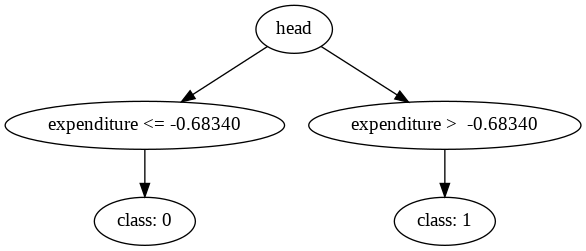

In [ ]:
dotNewTree1 = DotExporter(newHead1)
dotNewTree1.to_picture("newTree.png")
Image('newTree.png')

In [ ]:
oo2 = DotExporter(head2)
oo2.to_picture("tree.png")
# Image('tree.png')

In [ ]:
copyHead2 = deepcopy(head2)
newHead2 = optimizeTree(copyHead2)

# for pre, fill, node in RenderTree(newHead2):
#   print("%s%s" % (pre, node.name))

Node('/head')


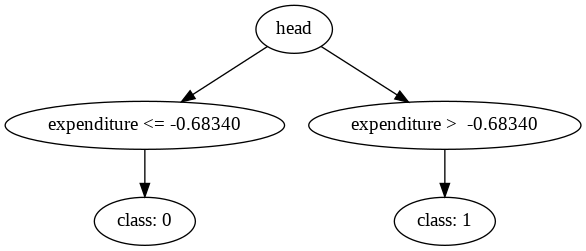

In [ ]:
dotNewTree2 = DotExporter(newHead2)
dotNewTree2.to_picture("newTree.png")
Image('newTree.png')

### Predict

In [ ]:
def checker(node, data):  
  child = node.children[0]

  if "class" in child.name:
    return int(child.name.split()[1])

  con = child.name.split()
  index = feature_cols.index(con[0])
  value = data[index]

  if ">" in con[1]:
    if value < float(con[2]):
      child = node.children[1]
  elif "<=" in con[1]:
    if value >= float(con[2]):
      child = node.children[1]
  return checker(child, data)

def predictTree(classifier, testX, testY):
  TT = 0
  FF = 0
  TF = 0
  FT = 0
  for index in range(len(testX)):
    data = testX[index]
    result = checker(deepcopy(classifier), data)
    if testY[index] == result:
      if result == 1:
        TT = TT + 1
      else:
        FF = FF + 1
    else:
      if result == 1:
        TF = TF + 1
      else:
        FT = FT + 1

  return [[TT, TF],[FT, FF]]

In [ ]:
cMat1 = predictTree(newHead1, X_test, y_test)

accuracyScore1 = (cMat1[0][0] + cMat1[1][1])/len(X_test)
print("accuracy: "+str(accuracyScore1))

precisionScore1 = cMat1[0][0]/(cMat1[0][0]+cMat1[1][0])
print("precision: "+str(precisionScore1))

recallScore1 = cMat1[0][0]/(cMat1[0][0]+cMat1[0][1])
print("recall: "+str(recallScore1))

accuracy: 0.9924242424242424
precision: 0.989247311827957
recall: 1.0


In [ ]:
cMat2 = predictTree(newHead2, X_test, y_test)

accuracyScore2 = (cMat2[0][0] + cMat2[1][1])/len(X_test)
print("accuracy: "+str(accuracyScore2))

precisionScore2 = cMat2[0][0]/(cMat2[0][0]+cMat2[1][0])
print("precision: "+str(precisionScore2))

recallScore2 = cMat2[0][0]/(cMat2[0][0]+cMat2[0][1])
print("recall: "+str(recallScore2))

accuracy: 0.9924242424242424
precision: 0.989247311827957
recall: 1.0


In [ ]:
cMat2

[[92, 0], [1, 39]]